# 따릉이 탄소량 계산 : 2020년~2022년 (3년)

# 2022년 월별 탄소량 계산 (2022년1월~12월)

In [8]:
### colab : matplotlib 한글 인식 (방법1)

# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,875 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [2]:
### 폰트 설치 후에 '런타임' > '세션 다시 시작' 하여 --> 여기서부터 ("이후 셀 실행")

### 설치한 나눔폰트로 설정 변경하기

## 필요한 함수 / 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import os
import warnings
warnings.filterwarnings('ignore')

# 폰트 지정 : 나눔바른고딕 폰트로 바꾸기
plt.rc('font', family='NanumBarunGothic')

# # 폰트 지정 : Malgun Gothic 폰트로 바꾸기
# plt.rc('font', family='Malgun Gothic')

# 설정된 font.family 확인하기
plt.rcParams['font.family']

['NanumBarunGothic']

## 데이터 불러오기

### 상반기 데이터 구성하기

In [ ]:
# 필요한 라이브러리 import
import os
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data1'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_22.01.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.02.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.03.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.06.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.04.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.05.csv']


In [ ]:
# 2022년 상반기(1월~6월) DataFrame 생성

df_2022_sang = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    df = pd.read_csv(file_path, encoding='cp949')
    df_2022_sang = pd.concat([df_2022_sang, df])

# 상반기 결과 확인하기
print(df_2022_sang.shape)
print('-'*80)
df_2022_sang.iloc[2000:2002, :]

(16328256, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2022-01-01,5,1240,1240. 문정 법조단지4,일일권,M,20대,1,0.00,0.00,0.0,16
2001,2022-01-01,5,1539,1539. 4.19민주묘지역,일일권,M,30대,1,41.70,0.38,1620.0,13


In [ ]:
# 데이터 크기가 커서 '대여일자', '탄소량' 컬럼만 사용
df_bike_sang = df_2022_sang.loc[:,('대여일자','탄소량')]

In [ ]:
# 상반기 결과 확인하기
print(df_bike_sang.shape)
print('-'*80)
df_bike_sang.iloc[2000:2002, :]

(16328256, 2)
--------------------------------------------------------------------------------


,대여일자,탄소량
2000,2022-01-01,0.00
2001,2022-01-01,0.38


In [ ]:
df_bike_sang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16328256 entries, 0 to 3704327
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   대여일자    object
 1   탄소량     object
dtypes: object(2)
memory usage: 373.7+ MB


In [ ]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike_sang.iloc[:,1] = df_bike_sang.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike_sang["탄소량"] = pd.to_numeric(df_bike_sang["탄소량"]) # 탄소량

In [ ]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike_sang['일자(date)'] = pd.to_datetime(df_bike_sang['대여일자'])
df_bike_sang['년'] = df_bike_sang['일자(date)'].dt.year
df_bike_sang['월'] = df_bike_sang['일자(date)'].dt.month
df_bike_sang['일'] = df_bike_sang['일자(date)'].dt.day

In [ ]:
df_bike_sang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16328256 entries, 0 to 3704327
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일자      object        
 1   탄소량       float64       
 2   일자(date)  datetime64[ns]
 3   년         int64         
 4   월         int64         
 5   일         int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 872.0+ MB


In [ ]:
df_bike_sang.iloc[5000000:5000002, :]

,대여일자,탄소량,일자(date),년,월,일
170019,2022-04-02,0.32,2022-04-02,2022,4,2
170020,2022-04-02,0.55,2022-04-02,2022,4,2


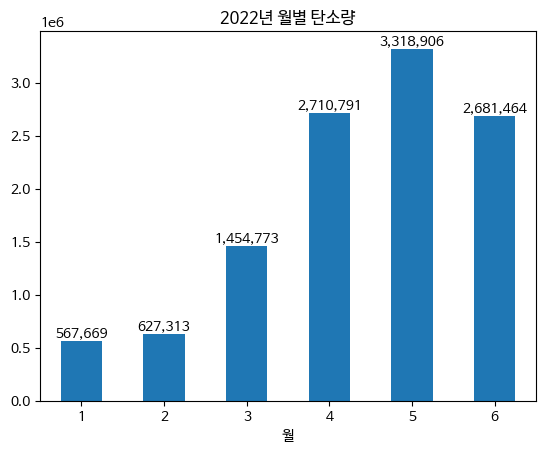

In [ ]:
# 월별 탄소량 합계
carbon_per_month_sang = df_bike_sang.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon_per_month_sang.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

### 하반기 데이터 구성하기

In [ ]:
# 필요한 라이브러리 import
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data2'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_22.12.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.08.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.07.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.11.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.10.csv', '서울특별시 공공자전거 이용정보(시간대별)_22.09.csv']


In [ ]:
# 2022년 하반기(7월~12월) DataFrame 생성

df_2022_ha = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    df = pd.read_csv(file_path, encoding='cp949')
    df_2022_ha = pd.concat([df_2022_ha, df])

# 하반기 결과 확인하기
print(df_2022_ha.shape)
print('-'*80)
df_2022_ha.iloc[2000:2002, :]

(19832231, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2022-12-01,1,779,779. 신정1동 주민센터 앞,일일권,M,기타,1,255.66,1.25,5380.0,69
2001,2022-12-01,1,1274,1274. 영파여고 앞,정기권,NaN,20대,1,15.70,0.14,610.0,3


In [ ]:
# 데이터 크기가 커서 '대여일자', '탄소량' 컬럼만 사용
df_bike_ha = df_2022_ha.loc[:,('대여일자','탄소량')]

In [ ]:
# 하반기 결과 확인하기
print(df_bike_ha.shape)
print('-'*80)
df_bike_ha.iloc[2000:2002, :]

(19832231, 2)
--------------------------------------------------------------------------------


,대여일자,탄소량
2000,2022-12-01,1.25
2001,2022-12-01,0.14


In [ ]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike_ha.iloc[:,1] = df_bike_ha.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike_ha["탄소량"] = pd.to_numeric(df_bike_ha["탄소량"]) # 탄소량

In [ ]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike_ha['일자(date)'] = pd.to_datetime(df_bike_ha['대여일자'])
df_bike_ha['년'] = df_bike_ha['일자(date)'].dt.year
df_bike_ha['월'] = df_bike_ha['일자(date)'].dt.month
df_bike_ha['일'] = df_bike_ha['일자(date)'].dt.day

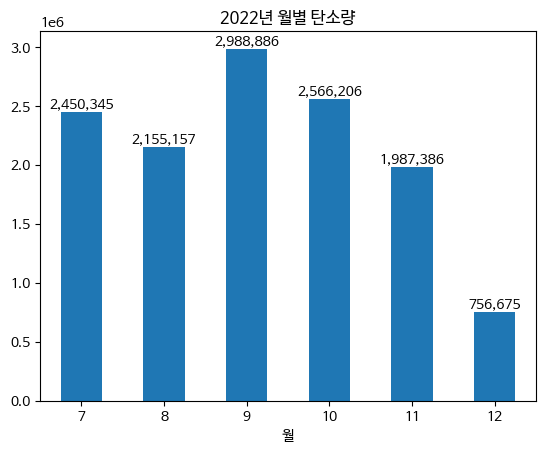

In [ ]:
# 월별 탄소량 합계
carbon_per_month_ha = df_bike_ha.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon_per_month_ha.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

In [ ]:
# 상하반기 합치기

df_bike2022 = pd.concat([df_bike_sang, df_bike_ha], axis=0)

In [ ]:
# 합친 결과 확인하기
print(df_bike2022.shape)
print('-'*80)
df_bike_ha.iloc[800000:800002, :]

(36160487, 6)
--------------------------------------------------------------------------------
              대여일자   탄소량   일자(date)     년   월   일
800000  2022-12-12  0.17 2022-12-12  2022  12  12
800001  2022-12-12  0.45 2022-12-12  2022  12  12


## 2022년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

In [ ]:
### 2022년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

# 저장 파일 경로 설정
save_file_2022 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2022.csv'

# df.to_csv() -> csv 파일로 저장
df_bike2022.to_csv(save_file_2022, encoding='cp949', index=False)

## [2022] 저장된 2022년 탄소량 계산에 필요한 CSV파일 불러오기

In [3]:
# 파일 경로 설정
file2022_path='/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2022.csv'

# pd.readcsv() -> DataFrame 생성
df_bike2022 = pd.read_csv(file2022_path, encoding='cp949')

## 2022년 월별 탄소량 시각화

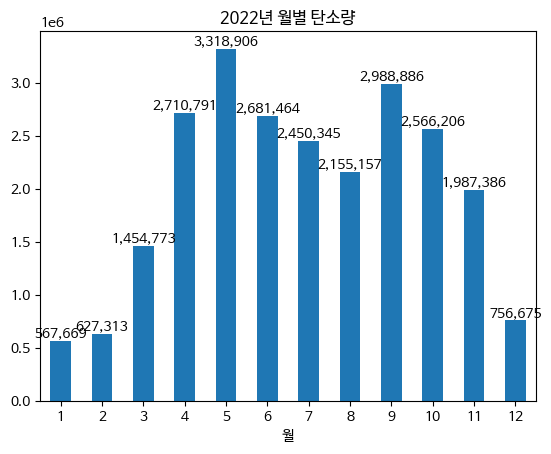

In [9]:
# 월별 탄소량 합계
carbon2022_per_month = df_bike2022.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon2022_per_month.plot(kind='bar', title="2022년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

In [ ]:
### 2022년 전체 탄소량 합계

total_carbon = df_bike2022['탄소량'].values.sum()

print(f'2022년 탄소량 합계 = {format(total_carbon,",.0f")}g(그램)')

# 따릉이 탄소 저감 정책 기준 1t (톤) 당 40,000~60,000원
total_carbon_price = total_carbon/(1000*1000)*60000

print('-'*80)
print(f'2022년 연간 탄소량 저감 금액 = {format(total_carbon_price,",.0f")}원 ')

2022년 탄소량 합계 = 24,265,572g(그램)
--------------------------------------------------------------------------------
2022년 연간 탄소량 저감 금액 = 1,455,934원 


# 2020년~2021년 탄소량 계산 추가

## 데이터 불러오기

In [ ]:
### ZIP 파일 불러와서 압축 해제 -> csv 파일
# !unzip -O cp949 '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/서울특별시 공공자전거 이용정보(시간대별)_2020년.zip' \
#         -d '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/2020'

In [ ]:
### ZIP 파일 불러와서 압축 해제 -> csv 파일
# !unzip -O cp949 '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/서울특별시 공공자전거 이용정보(시간대별)_2021년.zip' \
#         -d '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/2021'

## 2021년 탄소량 데이터

In [ ]:
# 필요한 라이브러리 import
import os
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/2021'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_21.12.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.11.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.07.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.08.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.09.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.10.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.06.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.05.csv', '서울특별시 공공자전거 이용정보(시간대별)_21.04.csv']


In [ ]:
# 2021년 DataFrame 생성

df_2021 = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    try :
        df = pd.read_csv(file_path, encoding='cp949')
        print(f'cp949 encoding : {file_path}')
    except UnicodeDecodeError :
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f'utf-8 encoding : {file_path}')
    except :
        print(file_path)
    df_2021 = pd.concat([df_2021, df])

# 결과 확인하기
print(df_2021.shape)
print('-'*80)
df_2021.iloc[2000:2002, :]


In [ ]:
# '대여일자', '탄소량' 컬럼만 사용
df_bike2021_part2 = df_2021.loc[:,('대여일자','탄소량')]

In [ ]:
### encoding error 난 2021년 1월~3월 파일 별도 작업

file2101 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv'
file2102 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/서울특별시 공공자전거 이용정보(시간대별)_21.02.csv'
file2103 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/서울특별시 공공자전거 이용정보(시간대별)_21.03.csv'

In [ ]:
### 2021년 1월 데이터
df_2101 = pd.read_csv(file2101, encoding='cp949')

In [ ]:
### 2021년 2월 데이터 <- cp949, utf-8 모두 encoding error 남

#  df_2102 = pd.read_csv(file2102, encoding='cp949')
# df_2102 = pd.read_csv(file2102, encoding='utf-8')
# df_2102 = pd.read_csv(file2102)
df_2102 = pd.read_csv(file2102, encoding='latin-1') # read_csv 오류는 나지 않지만, 한글 깨짐

In [ ]:
### 2021년 3월 데이터 <- cp949, utf-8 모두 encoding error 남
# df_2103 = pd.read_csv(file2103, encoding='cp949')
# df_2103 = pd.read_csv(file2103, encoding='utf-8')
# df2103 = pd.read_csv(file2103)
# df_2103 = pd.read_csv(file2103, encoding='euc-kr')
df_2103 = pd.read_csv(file2103, encoding='latin-1')  # read_csv 오류는 나지 않지만, 한글 깨짐

In [ ]:
### 2021년 2월 한글 깨진 컬럼명 재설정
df_2102.columns=['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간']

In [ ]:
### 2021년 3월 한글 깨진 컬럼명 재설정
df_2103.columns=['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간']

In [ ]:
### 2021년 1월~3월 데이터 합치기

df_21_01_03 = pd.concat([df_2101, df_2102, df_2103], axis=0)

In [ ]:
print(df_21_01_03.shape)
print('-'*80)
df_21_01_03.iloc[2000:2002, :]

(3621779, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
2000,2021-01-01,7,652,652. 답십리 래미안엘파인아파트 입구,정기권,M,40대,1,23.10,0.19,810.29,7.0
2001,2021-01-01,7,758,758. 한사랑교회 앞,정기권,M,40대,1,101.63,0.93,4010.00,21.0


In [ ]:
# '대여일자', '탄소량' 컬럼만 사용
df_bike2021_01_03 = []
df_bike2021_01_03 = df_21_01_03.loc[:,('대여일자','탄소량')]

In [ ]:
###  2021년 연간 데이터 합치기
df_bike2021 = pd.concat([df_bike2021_01_03,df_bike2021_part2] , axis=0)


In [ ]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike2021.iloc[:,1] = df_bike2021.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike2021["탄소량"] = pd.to_numeric(df_bike2021["탄소량"]) # 탄소량

In [ ]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike2021['일자(date)'] = pd.to_datetime(df_bike2021['대여일자'])
df_bike2021['년'] = df_bike2021['일자(date)'].dt.year
df_bike2021['월'] = df_bike2021['일자(date)'].dt.month
df_bike2021['일'] = df_bike2021['일자(date)'].dt.day

## 2021년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

In [ ]:
### 2021년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

# 저장 파일 경로 설정
save_file_2021 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2021.csv'

# df.to_csv() -> csv 파일로 저장
df_bike2021.to_csv(save_file_2021, encoding='cp949', index=False)


## [2021] 저장된 2021년 탄소량 계산에 필요한 CSV파일 불러오기

In [5]:
# 파일 경로 설정
file2021_path='/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2021.csv'

# pd.readcsv() -> DataFrame 생성
df_bike2021 = pd.read_csv(file2021_path, encoding='cp949')

## 2021년 월별 탄소량 시각화

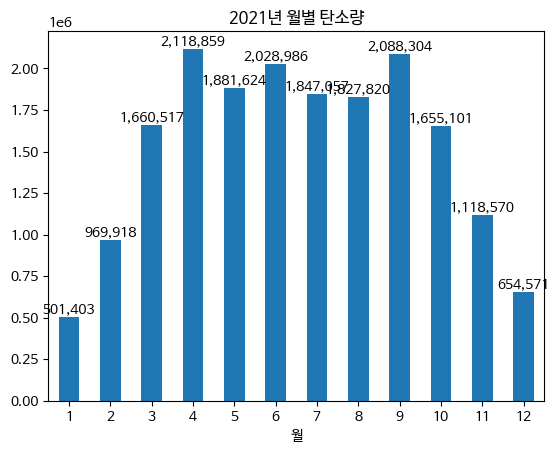

In [6]:
# 월별 탄소량 합계
carbon2021_per_month = df_bike2021.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon2021_per_month.plot(kind='bar', title="2021년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

## 2020년 탄소량 데이터

In [ ]:
# 필요한 라이브러리 import
import os
dir = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/2020'
files = os.listdir(dir)
print(files)

['서울특별시 공공자전거 이용정보(시간대별)_20.02.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.03.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.01.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.04.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.05.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.08.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.11.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.07.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.06.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.09.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.10.csv', '서울특별시 공공자전거 이용정보(시간대별)_20.12.csv']


In [ ]:
# 2020년 DataFrame 생성

df_2020 = pd.DataFrame()

for file in files :
    file_path = dir + '/' + file
    try :
        df = pd.read_csv(file_path, encoding='cp949')
        print(f'cp949 encoding : {file_path}')
    except UnicodeDecodeError :
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f'utf-8 encoding : {file_path}')
    except :
        print(file_path)
    df_2020 = pd.concat([df_2020, df])

# 결과 확인하기
print(df_2020.shape)
print('-'*80)
df_2020.iloc[2000:2002, :]

In [ ]:
# '대여일자', '탄소량' 컬럼만 사용
df_bike2020 = df_2020.loc[:,('대여일자','탄소량')]

In [ ]:
### 탄소량 컬럼 -> '\N' -> -1 로 대체
# 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike2020.iloc[:,1] = df_bike2020.iloc[:,1].replace(r'\N',-1) # 탄소량

### 탄소량 컬럼 numeric으로 형변환
df_bike2020["탄소량"] = pd.to_numeric(df_bike2020["탄소량"]) # 탄소량

In [ ]:
# 대여일자를 datetime으로 형변환해서 년,월,일 컬럼 추가
df_bike2020['일자(date)'] = pd.to_datetime(df_bike2020['대여일자'])
df_bike2020['년'] = df_bike2020['일자(date)'].dt.year
df_bike2020['월'] = df_bike2020['일자(date)'].dt.month
df_bike2020['일'] = df_bike2020['일자(date)'].dt.day

## 2020년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

In [ ]:
### 2020년 탄소량 계산에 필요한 컬럼만 CSV파일로 저장

# 저장 파일 경로 설정
save_file_2020 = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2020.csv'

# df.to_csv() -> csv 파일로 저장
df_bike2020.to_csv(save_file_2020, encoding='cp949', index=False)

## [2020] 저장된 2020년 탄소량 계산에 필요한 CSV파일 불러오기

In [7]:
# 파일 경로 설정
file2020_path='/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_cleaned_2020.csv'

# pd.readcsv() -> DataFrame 생성
df_bike2020 = pd.read_csv(file2020_path, encoding='cp949')

## 2020년 월별 탄소량 시각화

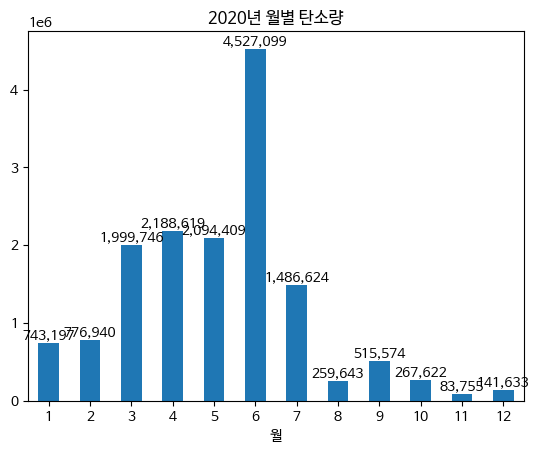

In [8]:
# 월별 탄소량 합계
carbon2020_per_month = df_bike2020.groupby('월')['탄소량'].sum()

### 일별 탄소량 시각화
ax = carbon2020_per_month.plot(kind='bar', title="2020년 월별 탄소량", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

# [2020~2022] 3년 탄소량 시각화

In [37]:
# [2020~2022] 3년 탄소량 연도별 합계
carbon2020_year_sum = carbon2020_per_month.values.sum()
print(f'2020년 탄소량 합계 = {carbon2020_year_sum}')
print('-'*80)
carbon2021_year_sum = carbon2021_per_month.values.sum()
print(f'2020년 탄소량 합계 = {carbon2021_year_sum}')
print('-'*80)
carbon2022_year_sum = carbon2022_per_month.values.sum()
print(f'2020년 탄소량 합계 = {carbon2022_year_sum}')

2020년 탄소량 합계 = 15084861.840000002
--------------------------------------------------------------------------------
2020년 탄소량 합계 = 18352731.419999998
--------------------------------------------------------------------------------
2020년 탄소량 합계 = 24265571.59


In [77]:
### [2020~2022] 3년 월별 탄소량 합치기
df_carbon_3year_per_month = pd.concat([carbon2020_per_month,carbon2021_per_month,carbon2022_per_month] , axis=1)
df_carbon_3year_per_month.columns = ['2020년','2021년','2022년']
df_carbon_3year_per_month


,2020년,2021년,2022년
월,,,
1,743197.41,501402.60,567669.24
2,776939.62,969917.97,627312.98
3,1999745.77,1660516.77,1454773.31
4,2188619.37,2118859.40,2710791.43
5,2094409.10,1881624.10,3318905.75
6,4527098.96,2028986.06,2681463.66
7,1486624.17,1847057.28,2450345.23
8,259642.96,1827820.24,2155157.40
9,515574.21,2088304.42,2988886.12


In [82]:
### [2020~2022] 3년 월별 탄소량 합치기 -> CSV파일에 저장하기

# 저장 파일 경로 설정
save_3year_file = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/carbon_data/따릉이_탄소량_2020_2022_월별합계.csv'

# df.to_csv() -> csv 파일로 저장
df_carbon_3year_per_month.to_csv(save_3year_file, encoding='cp949', index=False)

In [78]:
# [2020~2022] 3년 탄소량 연도별 합계 -> DataFrame
data = [carbon2020_year_sum,carbon2021_year_sum,carbon2022_year_sum]
index = ['2020년','2021년','2022년']
df_carbon_3year = pd.DataFrame(data=data,index=index)
df_carbon_3year

,0
2020년,15084861.84
2021년,18352731.42
2022년,24265571.59


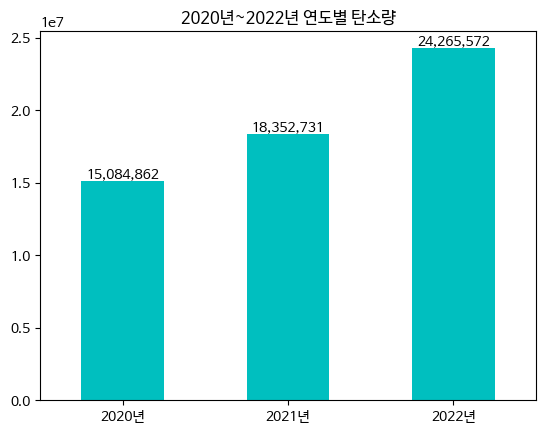

In [80]:
### 연도별 탄소량 시각화 (bar chart)

ax = df_carbon_3year.plot(kind='bar', title="2020년~2022년 연도별 탄소량", \
                          legend=False, color='c', rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()